Granger Causality

Granger Causality test is a statistical test that is used to determine if a given time series and it’s lags is helpful in explaining the value of another series. Let's say if we have two times series data X and Y, and we want to know if X is useful in predicting Y. Then we use Garner Casuality test to determine this.

This is often used with Vector Autoregression of forecasting.

Although we are testinng if a variable X is causal to Y, we are not exactly testing the true cause-and-effect rrelationship between two variables. That's because, in many occasions, correlation does not necessarily imply causation. We only test if X (and lags of X) is helpful in explaining Y, and thereby help forecasting it. So we are not concerned about the true casual relationship between the variables. That's why we say X Garner Causes Y instead of just X causes Y.

H0: The null hypothesis for the test assumes that the lagged values of X (where the numberof lags is usually specified by user) do not explain te vriance in Y i.e. lags of X do no Garner cause Y.

Fining out the number of lags required.

First, find out the number of lags of Y to include. Include as many lags that are individually significant based of the p-values (or t-statistics)
Then, keep as many lags of Y and on top of it add the lags of X. Retain as many lags of X that are indvidually significant.

Another apporach is to find the optimal value of lagged values of X is to try building models with various values of lags and choose the model that produces tthe lowest value of AIC/BIC scores.

Important Assumptions:
The Granger Casuality assuems that X and Y are stationary time series and hence, the statistical properties such as mean, variance do not change. So, if a time series is not stationary, it must be made stationary.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('BJsales.csv')
print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())


(150, 2)
   BJSales  Bjsales_lead
0    200.1         10.01
1    199.5         10.07
2    199.4         10.32
3    198.9          9.75
4    199.0         10.33
     BJSales  Bjsales_lead
145    263.3         13.50
146    262.8         13.58
147    261.8         13.51
148    262.2         13.77
149    262.7         13.40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BJSales       150 non-null    float64
 1   Bjsales_lead  150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB
None
          BJSales  Bjsales_lead
count  150.000000    150.000000
mean   229.978000     11.846733
std     21.479686      1.215853
min    198.600000      9.750000
25%    212.575000     10.805000
50%    220.650000     11.395000
75%    254.675000     13.117500
max    263.300000     13.870000


In [13]:
x = df.index
y1 = df['BJSales']
y2 = df['Bjsales_lead']

print(y1, y2)


0      200.1
1      199.5
2      199.4
3      198.9
4      199.0
       ...  
145    263.3
146    262.8
147    261.8
148    262.2
149    262.7
Name: BJSales, Length: 150, dtype: float64 0      10.01
1      10.07
2      10.32
3       9.75
4      10.33
       ...  
145    13.50
146    13.58
147    13.51
148    13.77
149    13.40
Name: Bjsales_lead, Length: 150, dtype: float64


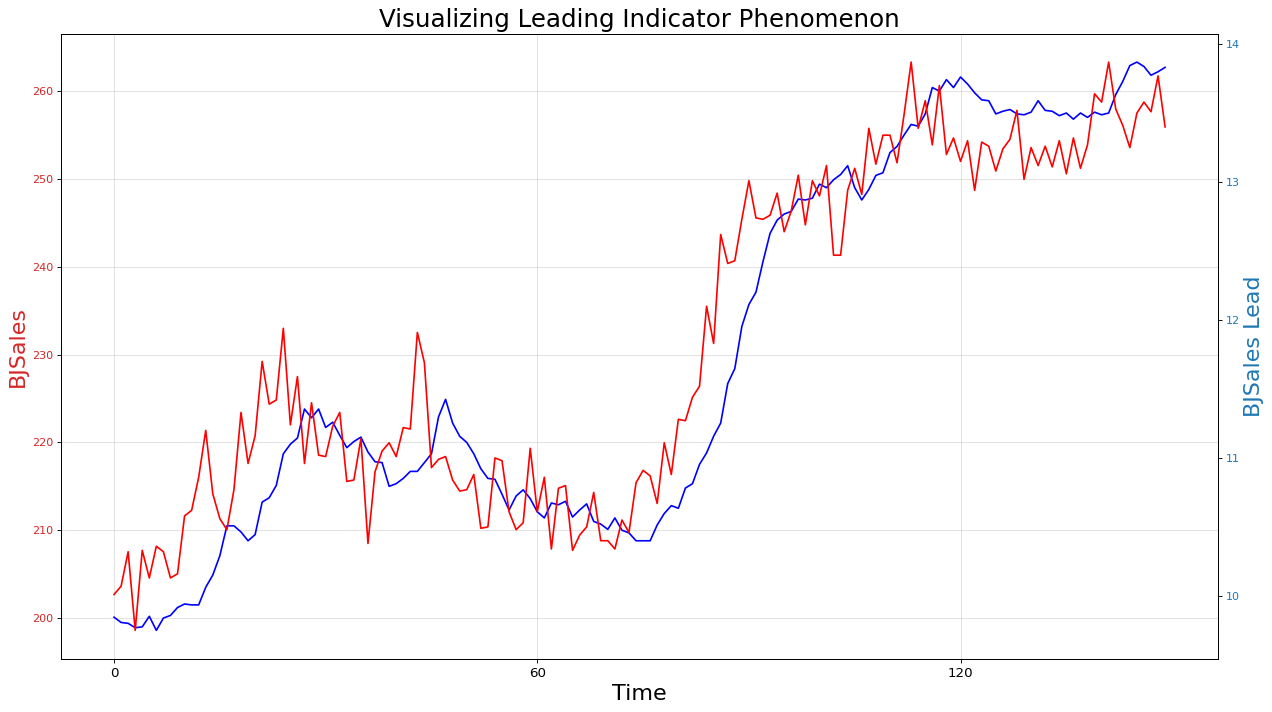

In [15]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, 1, figsize=(16, 9), dpi = 80)
ax1.plot(x, y1, "b")
ax2 = ax1.twinx()
ax2.plot(x, y2, "r")

# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('BJSales', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("BJSales Lead", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
fig.tight_layout()
plt.show()
